In [0]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving pibRN.csv to pibRN.csv
Saving salario.csv to salario.csv
User uploaded file "pibRN.csv" with length 4465 bytes
User uploaded file "salario.csv" with length 3601 bytes


In [0]:
!unzip dadosNE.zip

# Projeto: Aspectos Socioeconômicos na Região Nordeste 

### Autores:

- Gabriel Igor Queiroz Costa - gabriel.igorq@gmail.com
- Erick de Oliveira SIlva - erickoliveira.eos@gmail.com

- Link para geojson com limitações dos estados do Brasil - https://github.com/wakkoedu/kml-brasil/tree/master/lib/2010/estados/geojson



In [0]:
!pip install folium shapely

In [0]:
!pip install matplotlib

In [0]:
import os
import folium
import json
import pandas as pd
from branca.colormap import linear
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point
from numpy import random
#updating the files
from folium.plugins import HeatMap
from folium import plugins
import matplotlib.pyplot as plt

# 1 - Introdução

O Instituto Brasileiro de Geografia e Estatística - IBGE se constitui no principal provedor de dados e informações do País, que atendem às necessidades dos mais diversos segmentos da sociedade civil, bem como dos órgãos das esferas governamentais federal, estadual e municipal.

O IBGE oferece uma visão completa e atual do País, através do desempenho de suas principais funções:

- Produção e análise de informações estatísticas;
- Coordenação e consolidação das informações estatísticas;
- Produção e análise de informações geográficas;
- Coordenação e consolidação das informações geográficas;
- Estruturação e implantação de um sistema da informações ambientais;
- Documentação e disseminação de informações;
- Coordenação dos sistemas estatístico e cartográfico nacionais;

## 1.1 Pré- requisitos

O desenvolvimento deste projeto necessitará de dados contendo limites municipais no estado RN, contidos em um arquivo geojson disponibilizado pelo projeto GeodataBR.

In [0]:
# searching the files in geojson/geojs-xx-mun.json
br_states = os.path.join('geojson', 'geojs-24-mun.json')

# load the data and use 'latin-1'encoding because the accent
geo_json_data = json.load(open(br_states,encoding='latin-1'))

In [0]:
# http://cidades.ibge.gov.br/painel/historico.php?codmun=241030
# Presidente Juscelino city changes your name to Serra Caiada
geo_json_data['features'][112]['properties']['description'] = 'Serra Caiada'
geo_json_data['features'][112]['properties']['name'] = 'Serra Caiada'

# 2 - Índice de Desenvolvimento Humano(IDH) para os estados brasileiros (2010)

## 2.1 - Importando Dataset

In [0]:
dataIDH = pd.read_csv("IDH.csv")
# Mudando nome das colunas
dataIDH.columns = ["Estado", "IDH"]
# Ordenando em ordem crescente
df = dataIDH.sort_values(["IDH"], ascending=True)
df

,Estado,IDH
11,Alagoas,0.631
8,Maranhão,0.639
1,Pará,0.646
7,Piauí,0.646
13,Paraíba,0.658
14,Bahia,0.660
5,Acre,0.663
12,Sergipe,0.665
10,Pernambuco,0.673
2,Amazonas,0.674


## 2.2 - Barplot do IDH por estado em 2010

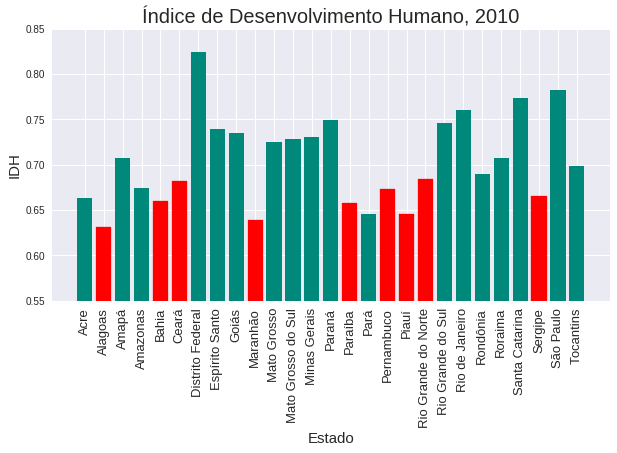

In [0]:
# creating a data visualization
import matplotlib.pyplot as plt
fig, axis = plt.subplots(figsize=(10,5))
# creating a bar graph type with the index and state
barlist = plt.bar(df['Estado'], df['IDH'], color="#00897B")
# putting name
plt.title("Índice de Desenvolvimento Humano, 2010", fontsize=20)
# customizing x ticks
plt.xticks( fontsize=13,rotation=90)
# name of the x 
plt.xlabel("Estado", fontsize=15)
# name of the y
plt.ylabel("IDH", fontsize=15)
plt.ylim(0.55, 0.85)
#changing bar colors
#Nordeste
barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[3].set_color('r')
barlist[4].set_color('r')
barlist[5].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[10].set_color('r')
barlist[11].set_color('r')
# saving the graph on a picture
plt.savefig("IDH.png")
plt.show()

# 3 - IDH dos municípios do RN (2010)

In [0]:
# Dados de 2010
idhRN = pd.read_csv("idhRN.csv")
idhRN.columns = ["Cidades", "IDH"]
idhRN["Cidades"][91] = "Olho-d'Água do Borges"
idhRN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
Cidades    167 non-null object
IDH        167 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Ordenando para verificar os melhores IDHs do estado
idh_RN_melhoresIDH = idhRN.sort_values(["IDH"], ascending=False)
idh_RN_melhoresIDH.head(5)

,Cidades,IDH
35,Parnamirim,0.766
88,Natal,0.763
87,Mossoró,0.720
22,Caicó,0.710
134,São José do Seridó,0.694


In [0]:
# Ordenando para verificar os piores IDHs do estado
idh_RN_pioresIDH = idhRN.sort_values(["IDH"], ascending=True)
idh_RN_pioresIDH.head(5)

,Cidades,IDH
64,João Dias,0.530
95,Parazinho,0.549
50,Ielmo Marinho,0.550
69,Lagoa de Pedras,0.553
126,São Bento do Norte,0.555


In [0]:
#Criando dicionario
idh_dict = idhRN.set_index('Cidades')['IDH']
idh_dict[:3]

Cidades
Acari             0.679
Açu               0.661
Afonso Bezerra    0.585
Name: IDH, dtype: float64

In [0]:
# colormap yellow and green (YlGn)
colormap = linear.YlGn_03.scale(
    idhRN["IDH"].min(),
    idhRN["IDH"].max())

print(colormap(5000.0))

colormap

#31a354


In [0]:
# option 1

# Create a map object
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

# Configure geojson layer
folium.GeoJson(
    geo_json_data,
    name='IDH no RN(2010)',
    style_function=lambda feature: {
        'fillColor': colormap(idh_dict[feature['properties']['description']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

colormap.caption = 'IDH(2010)'
colormap.add_to(m)

folium.LayerControl().add_to(m)

m


# 4 - PIB por municipio no RN (2015)

In [62]:
pibRN = pd.read_csv("pibRN.csv")
pibRN.columns = ["Cidades", "PIB"]
pibRN["Cidades"][91] = "Olho-d'Água do Borges"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Melhores PIBs do estado do RN
melhores_pib_RN = pibRN.sort_values(["PIB"], ascending=False)
melhores_pib_RN.head(5)

,Cidades,PIB
88,Natal,20904275.54
87,Mossoró,6046733.21
35,Parnamirim,4597279.74
130,São Gonçalo do Amarante,1555780.92
77,Macaíba,1413001.77


In [0]:
# Piores PIBs do estado do RN
piores_pib_RN = pibRN.sort_values(["PIB"], ascending=True)
piores_pib_RN.head(5)

,Cidades,PIB
165,Viçosa,14837.02
64,João Dias,18510.48
86,Monte das Gameleiras,19692.02
151,Taboleiro Grande,21161.29
52,Ipueira,21915.17


In [0]:
#Criando dicionario
pib_dict = pibRN.set_index('Cidades')['PIB']
pib_dict[:3]

Cidades
Acari             110768.65
Açu               877023.45
Afonso Bezerra     74886.75
Name: PIB, dtype: float64

In [0]:
# colormap yellow and green (YlGn)
colormap = linear.BuGn_03.scale(
    pibRN["PIB"].min(),
    pibRN["PIB"].max())

print(colormap(5000.0))

colormap

#e5f5f9


In [0]:
# option 1

# Create a map object
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

# Configure geojson layer
folium.GeoJson(
    geo_json_data,
    name='PIB no RN(2015)',
    style_function=lambda feature: {
        'fillColor': colormap(pib_dict[feature['properties']['description']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

colormap.caption = 'PIB(2015)'
colormap.add_to(m)

folium.LayerControl().add_to(m)

m

# 5 - Salário Médio mensal dos trabalhadores formais do RN (2016)

## 5.1 - Verificando o dataset

In [63]:
dRN = pd.read_csv("salario.csv")
dRN.columns = ["Cidades", "Salario Médio"]
dRN["Cidades"][91] = "Olho-d'Água do Borges"
dRN.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cidades,Salario Médio
0,Acari,1.5
1,Açu,1.7
2,Afonso Bezerra,1.8
3,Água Nova,1.5
4,Alexandria,1.4


In [0]:
# Melhores médias de salário por municipio do RN
dRN_melhores = dRN.sort_values(["Salario Médio"], ascending=False)
dRN_melhores.head(5)

,Cidades,Salario Médio
49,Guamaré,4.5
88,Natal,3.0
6,Alto do Rodrigues,2.9
103,Pedra Grande,2.7
47,Governador Dix-Sept Rosado,2.5


In [0]:
# Piores médias de salário por municipio do RN
dRN_piores = dRN.sort_values(["Salario Médio"], ascending=True)
dRN_piores.head(5)

,Cidades,Salario Médio
43,Francisco Dantas,1.2
44,Frutuoso Gomes,1.2
129,São Francisco do Oeste,1.2
134,São José do Seridó,1.2
53,Itajá,1.3


In [64]:
print( 'Média Salarial no estado do RN: ', dRN['Salario Médio'].mean() )

Média Salarial no estado do RN:  1.7161676646706587


## 5.2 - Gerando Mapa

In [0]:
dicionario = dRN.set_index('Cidades')['Salario Médio']
dicionario[:3]

Cidades
Acari             1.5
Açu               1.7
Afonso Bezerra    1.8
Name: Salario Médio, dtype: float64

In [0]:
# colormap yellow and green (YlGn)
colormap = linear.YlGn_03.scale(
    dRN["Salario Médio"].min(),
    dRN["Salario Médio"].max())

print(colormap(5000.0))

colormap

#31a354


In [0]:
# option 1

# Create a map object
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

# Configure geojson layer
folium.GeoJson(
    geo_json_data,
    name='Salário Médio mensal dos trabalhadores (2016)',
    style_function=lambda feature: {
        'fillColor': colormap(dicionario[feature['properties']['description']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

colormap.caption = 'Salário Médio mensal dos trabalhadores (2016)'
colormap.add_to(m)

marker_cluster = plugins.MarkerCluster().add_to(m)
folium.Marker([-5.2, -36.3248285], popup='<i>Guamaré</i>').add_to(marker_cluster)

folium.LayerControl().add_to(m)

m


# 6 - Ensino Fundamental no Brasil - Matrículas (2017)

In [0]:
efBR = pd.read_csv("Ensino_Fundamental_BR.csv")
efBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
Local           27 non-null object
 "undefined"    27 non-null int64
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [0]:
efBR.columns = ["Estado", "Matrículas"]
efBR.sort_values(["Matrículas"], ascending=True)

,Estado,Matrículas
3,Roraima,93652
6,Amapá,135995
5,Acre,159416
4,Tocantins,249691
0,Rondônia,272328
12,Sergipe,334473
26,Distrito Federal,381463
23,Mato Grosso do Sul,404450
24,Mato Grosso,463469
17,Rio Grande do Norte,475645


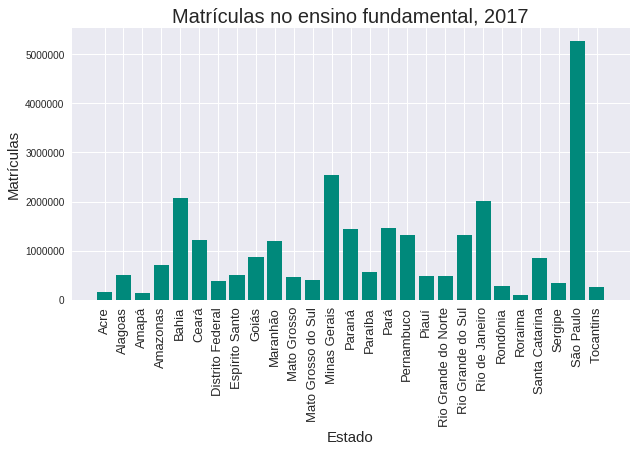

In [0]:
# creating a data visualization
import matplotlib.pyplot as plt
fig, axis = plt.subplots(figsize=(10,5))
# creating a bar graph type with the index and state
barlist = plt.bar(efBR['Estado'], efBR['Matrículas'], color="#00897B")
# putting name
plt.title("Matrículas no ensino fundamental, 2017", fontsize=20)
# customizing x ticks
plt.xticks( fontsize=13,rotation=90)
# name of the x 
plt.xlabel("Estado", fontsize=15)
# name of the y
plt.ylabel("Matrículas", fontsize=15)
plt.show()

# 7 - Ensino Fundamental no RN

In [0]:
efRN = pd.read_csv("ensino_fundamental_RN.csv")
efRN.columns = ["Cidade", "Matrículas"]
efRN["Cidade"][91] = "Olho-d'Água do Borges"
efRN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cidade,Matrículas
0,Acari,1202
1,Açu,8505
2,Afonso Bezerra,1544
3,Água Nova,463
4,Alexandria,1919
5,Almino Afonso,682
6,Alto do Rodrigues,2052
7,Angicos,1581
8,Antônio Martins,934
9,Apodi,4208


In [0]:
# Municipios com maior numero de estudantes no Ensino Fundamental
mais_estudantes_muni = efRN.sort_values(["Matrículas"], ascending=False)
mais_estudantes_muni.head(5)

,Cidade,Matrículas
88,Natal,100543
87,Mossoró,36848
35,Parnamirim,31667
130,São Gonçalo do Amarante,14426
28,Ceará-Mirim,12782


In [0]:
# Municipios com menor numero de estudantes no Ensino Fundamental
menos_estudantes_muni = efRN.sort_values(["Matrículas"], ascending=True)
menos_estudantes_muni.head(5)

,Cidade,Matrículas
165,Viçosa,225
157,Timbaúba dos Batistas,261
52,Ipueira,261
124,Santana do Seridó,318
43,Francisco Dantas,328


In [0]:
efRN_dict = efRN.set_index('Cidade')['Matrículas']
efRN_dict[:3]

Cidade
Acari             1202
Açu               8505
Afonso Bezerra    1544
Name: Matrículas, dtype: int64

In [0]:
# colormap yellow and green (YlGn)
colormap = linear.BuGn_05.scale(
    efRN["Matrículas"].min(),
    efRN["Matrículas"].max())

print(colormap(5000.0))

colormap

#e2f4f7


In [0]:
# option 1

# Create a map object
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

# Configure geojson layer
folium.GeoJson(
    geo_json_data,
    name='Matrículas no ensino fundamental no RN (2017)',
    style_function=lambda feature: {
        'fillColor': colormap(efRN_dict[feature['properties']['description']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

colormap.caption = 'Matrículas no ensino fundamental (2017)'
colormap.add_to(m)

folium.LayerControl().add_to(m)

m


# 8 - Escolaridade no RN

Nesta seção visualizaremos e analisaremos os dados sobre a escolaridade no estado do Rio Grande do Norte.

## 8.1 Lendo dados e fazendo analise inicial

In [0]:
# escolarização entre 6 e 14 anos de idade
escol_rn = pd.read_csv( 'escolarizacao.csv' )
escol_rn.columns = ['Cidades', 'Taxa de Escolarizacao']
escol_rn["Cidades"][91] = "Olho-d'Água do Borges"
escol_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
Cidades                  167 non-null object
Taxa de Escolarizacao    167 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Cidades com maior indice de escolarização
maior_escol_rn = escol_rn.sort_values(['Taxa de Escolarizacao'], ascending=False)
maior_escol_rn.head(5)

,Cidades,Taxa de Escolarizacao
115,Rafael Godeiro,100.0
117,Riacho de Santana,99.7
62,Jardim do Seridó,99.6
45,Galinhos,99.5
75,Lucrécia,99.5


In [0]:
# Cidades com menor indice de escolarização
menor_escol_rn = escol_rn.sort_values(['Taxa de Escolarizacao'], ascending=True)
menor_escol_rn.head(5)

,Cidades,Taxa de Escolarizacao
64,João Dias,87.8
141,São Vicente,92.5
127,São Bento do Trairí,92.9
84,Montanhas,94.6
109,Poço Branco,95.0


In [0]:
print( 'Média de escolaridade no estado do RN: ', escol_rn['Taxa de Escolarizacao'].mean() )

Média de escolaridade no estado do RN:  97.51976047904192


## 8.2 Desenhando um ColorMap com os dados da Escolarização

In [0]:
# cria o dicionario
escol_dict = escol_rn.set_index('Cidades')['Taxa de Escolarizacao']
escol_dict[:3]

Cidades
Acari             97.6
Açu               97.6
Afonso Bezerra    98.8
Name: Taxa de Escolarizacao, dtype: float64

In [0]:
# colormap yellow and green (YlGn)
colormap = linear.BuGn_05.scale(
    escol_rn["Taxa de Escolarizacao"].min(),
    escol_rn["Taxa de Escolarizacao"].max())

print(colormap(5000.0))

colormap

#006d2c


In [0]:
# mapa com os indices de escolarização no estado do RN


m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

folium.GeoJson(
    geo_json_data,
    name='Escolarização de crianças entre 6 e 14 anos, no estado do RN, por municipio',
    style_function=lambda feature: {
        'fillColor': colormap_escol(escol_dict[feature['properties']['description']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

colormap.caption = 'Escolarizaçãode crianças entre 6 e 14 anos, no estado do RN, por municipio'
colormap.add_to(m)

folium.LayerControl().add_to(m)

m